In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#reading dataset
df=pd.read_csv("fifa_eda.csv")
print(df.shape)

(18207, 18)


In [2]:
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565,Left,5.0,4.0,RF,2004,01-01-2021,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405,Right,5.0,5.0,ST,2018,01-01-2022,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290,Right,5.0,5.0,LW,2017,01-01-2022,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260,Right,4.0,1.0,GK,2011,01-01-2020,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355,Right,4.0,4.0,RCM,2015,01-01-2023,5.916667,154.0,196400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1,Right,1.0,2.0,CM,2017,01-01-2019,5.750000,134.0,143.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1,Right,1.0,2.0,ST,2018,01-01-2020,6.250000,170.0,113.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1,Right,1.0,2.0,ST,2017,01-01-2021,5.666667,148.0,165.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1,Right,1.0,2.0,RW,2018,01-01-2019,5.833333,154.0,143.0


In [3]:
df.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [4]:
df=df.dropna(subset=['Club','Contract Valid Until','International Reputation','Skill Moves','Value'])

In [5]:
df.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

# EDA Analysis 

In [6]:
#to check no of unique instant of an attribute
for f in df.columns:
    print(f,df[f].nunique())

ID 17907
Name 16913
Age 28
Nationality 163
Overall 48
Potential 47
Club 651
Value 216
Wage 143
Preferred Foot 2
International Reputation 5
Skill Moves 5
Position 27
Joined 22
Contract Valid Until 35
Height 21
Weight 57
Release Clause 1245


25.0


<AxesSubplot:xlabel='Age', ylabel='Count'>

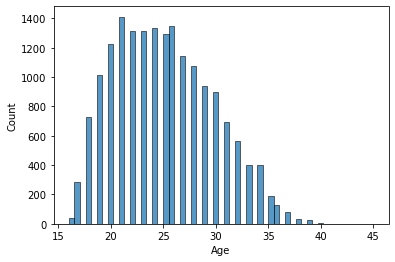

In [7]:
#median age 
import seaborn as sns
print(df['Age'].median())
sns.histplot(x='Age',data=df)

<AxesSubplot:xlabel='Preferred Foot', ylabel='count'>

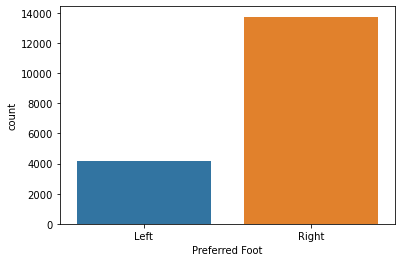

In [8]:
#to check whether majority of players prefer left foot or right foot
sns.countplot(x='Preferred Foot',data=df)


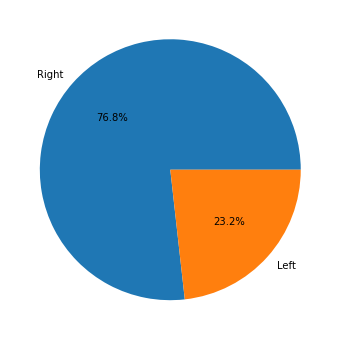

In [9]:
#to check how much percenentage of players prefer left foot or right foot
plt.subplots(figsize=(6,6))
plt.pie(df["Preferred Foot"].value_counts(), labels=["Right","Left"],autopct="%1.1f%%")
plt.show()

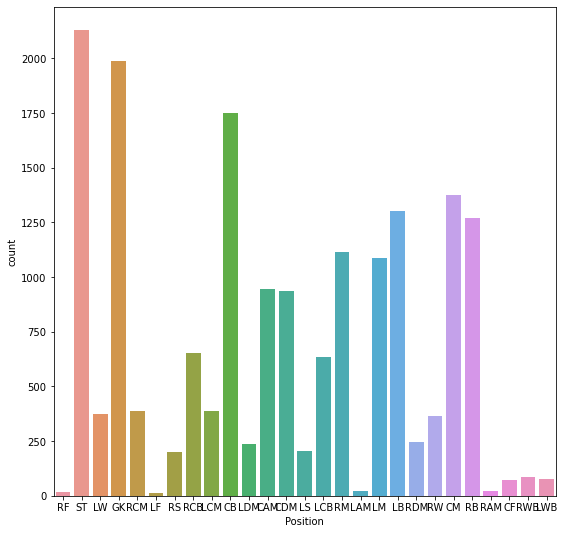

In [10]:
#to find which position most players are play in
plt.subplots(figsize=(9,9))
sns.countplot(x='Position',data=df)
plt.show()

<AxesSubplot:xlabel='International Reputation', ylabel='count'>

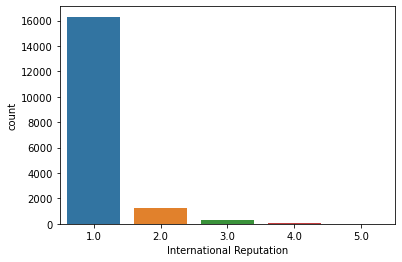

In [11]:
#to find how strong are their reputation on a scale of 1-5
sns.countplot(x='International Reputation',data=df)

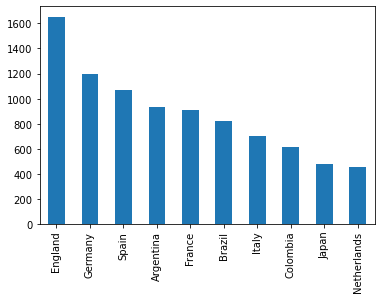

In [12]:
#to find the top 10 countries with the most players in FIFA.
national = df['Nationality'].value_counts()[:10]
national.plot.bar()
plt.show()

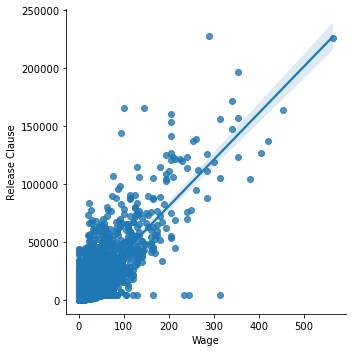

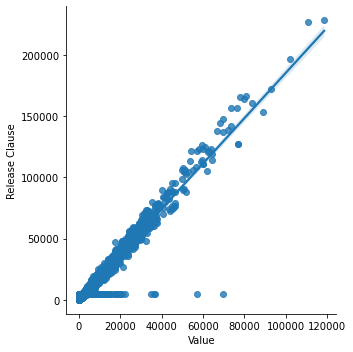

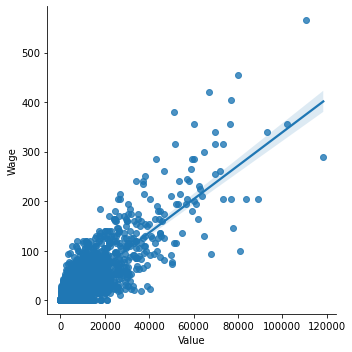

In [13]:
#to find relation between Wage,Relase Clause and Value.
sns.lmplot(x='Wage',y='Release Clause',data=df)
sns.lmplot(x='Value',y='Release Clause',data=df)
sns.lmplot(x='Value',y='Wage',data=df)

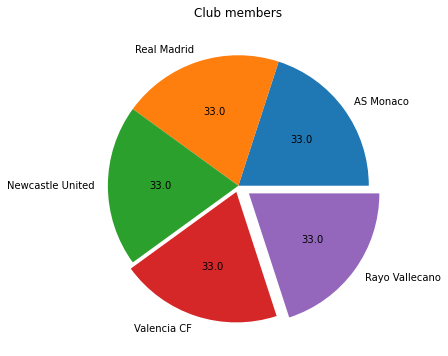

In [14]:
#top 5 clubs with most players.
plt.subplots(figsize=(6,6))
size = df["Club"].value_counts().sort_values(ascending = False).head(5)
def value(val):
               x = np.round(val/100.*size.sum())
               return x
plt.pie(size, labels = size.index, autopct = value, explode=[0,0,0,0.05,0.1])
plt.title("Club members")
plt.show()